In [48]:
#Pkg.add("PyPlot")
using Pkg
using PyPlot

In [49]:
# Parameters
popSize = 450000; # Ada county population estimate
MDperHundThou = 95; # Number of primary care
MDvisitsPerDay = 10; # Average number of visits per day per doctor
RØ = 1.15; # Daily growth rate estimate

In [50]:
# Make array of infected population growth
currentInfected = 113; # taken from https://coronavirus.idaho.gov/ on 3/30/2020
projectedInfected = [currentInfected];
t = 1;

infectedPercent = currentInfected/popSize;

while infectedPercent <= .5
    newInfected = round(projectedInfected[t] * RØ);
    append!(projectedInfected,newInfected);
    t = t + 1;
    infectedPercent = projectedInfected[t]/popSize
end

In [51]:
# Rounded estimate of number of total Ada county visits
MDs = MDperHundThou * (popSize/100000);
VisitsPerDay = MDvisitsPerDay * MDs;
VisitsPerDay = round(VisitsPerDay); 

In [75]:
# Calculate how many new patients with CV-19 could be distributed across available primary care physicians
likelihoodInfected = [];
newPatients =[];
for i = 1:length(projectedInfected)-1
   numberNewPatients = projectedInfected[i+1]-projectedInfected[i]; #number of new CV-19 patients
   append!(newPatients,numberNewPatients)  
   append!(likelihoodInfected,numberNewPatients/MDs) #likelihood a CV-19 patient is in at least one patient slot. 
end

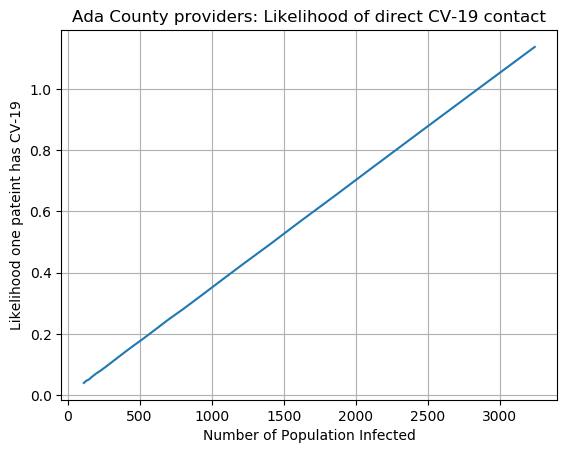

In [83]:
stopElement = findfirst(x -> x>1.0,likelihoodInfected)
p = plot(projectedInfected[1:stopElement],likelihoodInfected[1:stopElement])
xlabel("Number of Population Infected")
ylabel("Likelihood one pateint has CV-19")
PyPlot.title("Ada County providers: Likelihood of direct CV-19 contact")
grid("on")


In [84]:
# Number of total CV patients when one to one ration of appointments and new patients is acheived.
projectedInfected[stopElement]

3243